# Package

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

# Analysis of gender distribution in df_train and df_test

In [3]:
stats = df_train.groupby('db_number')[['count','gender_id','FaceOcclusion']].sum()
stats.loc['TOTAL'] = stats.sum()
stats['FaceOcclusion'] = stats['FaceOcclusion']/stats['count']
stats['FaceOcclusion'] = stats['FaceOcclusion'].map('{:.2%}'.format)
stats['gender_ratio'] = stats['gender_id']/stats['count']
stats ['gender_ratio'] = stats['gender_ratio'].map('{:.2%}'.format)     
stats

,count,gender_id,FaceOcclusion,gender_ratio
db_number,,,,
1,30000.0,10845.0,11.42%,36.15%
2,1345.0,717.0,12.99%,53.31%
3,69996.0,49352.0,7.56%,70.51%
TOTAL,101341.0,60914.0,8.78%,60.11%


# Comment

- DB 3 clearly dominates the dataset (≈ 69%) and is heavily female-dominated (≈ 70% of images labeled as "female"), while also having the lowest occlusion rate.
- DB 2 is the smallest, but has the highest occlusion rate (≈ 13%).
- DB 1 is mostly male (≈ 64%) with an intermediate occlusion rate (≈ 11%).

→ The dataset is highly heterogeneous in terms of size, gender distribution, and degree of occlusion.

# Face OCCLUSION BY GENDER

In [5]:
stats = df_train.groupby('gender_id')[['count','FaceOcclusion']].sum()
stats.loc['TOTAL'] = stats.sum()
stats['FaceOcclusion'] = stats['FaceOcclusion']/stats['count']
stats['FaceOcclusion'] = stats['FaceOcclusion'].map('{:.2%}'.format)
stats

,count,FaceOcclusion
gender_id,,
0,40427.0,13.01%
1,60914.0,5.97%
TOTAL,101341.0,8.78%


# Comment

- 60% of the images belong to the "Female" (gender class 1).
- Female have more than twice as many partially occluded faces as women.

# stats by gender and database (1,2 or 3)

C:\Users\Mita\AppData\Local\Temp\ipykernel_4256\1617968890.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (stats['FaceOcclusion'][i], stats['pixels_mean'][i]),
C:\Users\Mita\AppData\Local\Temp\ipykernel_4256\1617968890.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


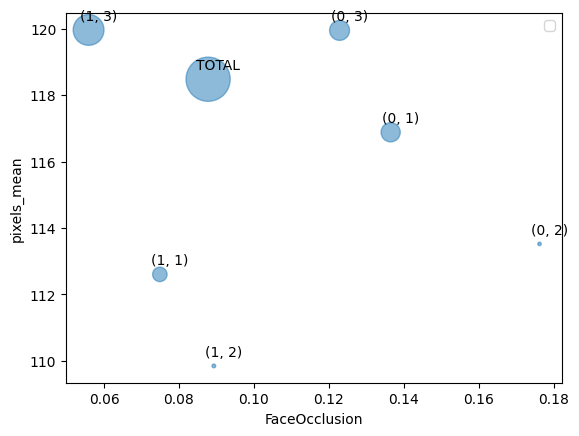

,count,FaceOcclusion,pixels_mean,Occ_ratio
"(0, 1)",19155.0,0.136473,116.882212,13.65%
"(0, 2)",628.0,0.176193,113.520409,17.62%
"(0, 3)",20644.0,0.122845,119.950728,12.28%
"(1, 1)",10845.0,0.074884,112.602381,7.49%
"(1, 2)",717.0,0.089300,109.845270,8.93%
"(1, 3)",49352.0,0.055876,119.965085,5.59%
TOTAL,101341.0,0.087769,118.479995,8.78%


In [8]:
# stats by gender and database (1,2 or 3)

stats = df_train.groupby(['gender_id','db_number'])[['count','FaceOcclusion','pixels_mean']].sum()
stats.loc['TOTAL'] = stats.sum()
stats['FaceOcclusion'] = stats['FaceOcclusion']/stats['count']
stats['pixels_mean'] = stats['pixels_mean']/stats['count']
stats['Occ_ratio'] = stats['FaceOcclusion'].map('{:.2%}'.format)

plt.scatter(stats['FaceOcclusion'], stats['pixels_mean'], s=stats['count'] / 100, alpha=0.5)
for i, txt in enumerate(stats.index):
    plt.annotate(txt, (stats['FaceOcclusion'][i], stats['pixels_mean'][i]),
                 textcoords="offset points", xytext=(7,7), ha='center')
plt.xlabel('FaceOcclusion')
plt.ylabel('pixels_mean')
plt.legend()
plt.show()

stats

# Comment

- Men are consistently more occluded than women, with nearly twice as many partially occluded faces in each database.

- Women are generally brighter, especially in DB3, which shows the highest average pixel values.

- DB2 is the darkest and most occluded database, while DB3 is the brightest and least occluded.

# stats by gender and database (1,2 or 3)

C:\Users\Mita\AppData\Local\Temp\ipykernel_4256\1301217556.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (stats['FaceOcclusion'][i], stats['pixels_mean'][i]),
C:\Users\Mita\AppData\Local\Temp\ipykernel_4256\1301217556.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (stats['FaceOcclusion'][i], stats['pixels_mean'][i]),
C:\Users\Mita\AppData\Local\Temp\ipykernel_4256\1301217556.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

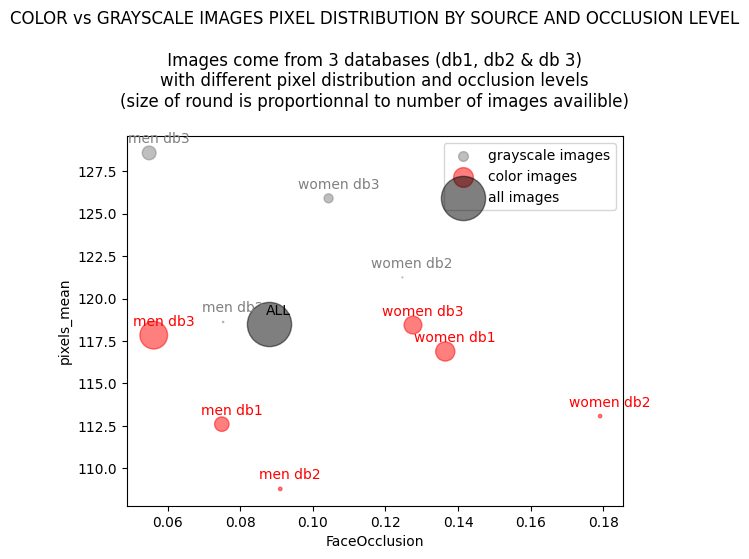

,count,FaceOcclusion,pixels_mean,Occ_ratio
"(0, 0, 2)",34.0,0.124647,121.242183,12.46%
"(0, 0, 3)",4194.0,0.104312,125.896685,10.43%
"(0, 1, 2)",77.0,0.075247,118.618112,7.52%
"(0, 1, 3)",9770.0,0.054866,128.570309,5.49%
"(1, 0, 1)",19155.0,0.136473,116.882212,13.65%
"(1, 0, 2)",594.0,0.179143,113.078422,17.91%
"(1, 0, 3)",16450.0,0.127571,118.434779,12.76%
"(1, 1, 1)",10845.0,0.074884,112.602381,7.49%
"(1, 1, 2)",640.0,0.090991,108.789788,9.10%
"(1, 1, 3)",39582.0,0.056126,117.841063,5.61%


In [9]:
stats = df_train.groupby(['color','gender_id','db_number'])[['count','FaceOcclusion','pixels_mean']].sum()
stats.loc['TOTAL'] = stats.sum()
stats['FaceOcclusion'] = stats['FaceOcclusion']/stats['count']
stats['pixels_mean'] = stats['pixels_mean']/stats['count']
stats['Occ_ratio'] = stats['FaceOcclusion'].map('{:.2%}'.format)


plt.scatter(stats['FaceOcclusion'][0:4], stats['pixels_mean'][0:4], color='gray' , marker='o', label='grayscale images', s=stats['count'][0:4] / 100, alpha=0.5) 
plt.scatter(stats['FaceOcclusion'][4:10], stats['pixels_mean'][4:10],color='red' ,marker='o', label='color images', s=stats['count'][4:10] / 100, alpha=0.5)
plt.scatter(stats['FaceOcclusion'][10:], stats['pixels_mean'][10:],color='black' , label='all images', s=stats['count'][10:] / 100, alpha=0.5)

# labels = ['w db2','w db3','m db2','m db3','w db1','w db2','w db3','m db1','m db2','m db3','ALL']
labels = ['women db2','women db3','men db2','men db3','women db1','women db2','women db3','men db1','men db2','men db3','ALL']
labels = ['','','','','','','','','','','ALL']
for i, txt in enumerate(labels): #enumerate(stats.index):
    plt.annotate(txt, (stats['FaceOcclusion'][i], stats['pixels_mean'][i]),
                 textcoords="offset points", xytext=(7,7), ha='center', color = "black")
# labels = ['','','','','w db1','w db2','w db3','m db1','m db2','m db3','']
labels = ['','','','','women db1','women db2','women db3','men db1','men db2','men db3','']
for i, txt in enumerate(labels[0:10]): #enumerate(stats.index):
    plt.annotate(txt, (stats['FaceOcclusion'][i], stats['pixels_mean'][i]),
                 textcoords="offset points", xytext=(7,7), ha='center', color = "red")
# labels = ['w db2','w db3','m db2','m db3','','','','','','','']
labels = ['women db2','women db3','men db2','men db3','','','','','','','']
for i, txt in enumerate(labels[0:4]): #enumerate(stats.index):
    plt.annotate(txt, (stats['FaceOcclusion'][i], stats['pixels_mean'][i]),
                 textcoords="offset points", xytext=(7,7), ha='center', color = "gray")
    

plt.xlabel('FaceOcclusion')
plt.ylabel('pixels_mean')
plt.legend()
plt.title('COLOR vs GRAYSCALE IMAGES PIXEL DISTRIBUTION BY SOURCE AND OCCLUSION LEVEL\n\n Images come from 3 databases (db1, db2 & db 3) \nwith different pixel distribution and occlusion levels\n(size of round is proportionnal to number of images availible)\n')
plt.show()

stats

# Key Observations

## Grayscale Images (Color = 0):
- DB 3 (both genders) has the highest brightness: Males: 125.90, Females: 128.57
- Females are less occluded than males, with lower occlusion ratios and occlusion means (e.g., 5.49% vs. 10.43%).
- Grayscale DB 2 contains very few samples and is less reliable.

## Color Images (Color = 1):
- Males are more occluded than females across all databases: Example: DB 2 → 17.91% (♂) vs. 9.10% (♀)
- Females are brighter in DB 3: 117.84 (♀) vs. 118.43 (♂), but with much lower occlusion (5.61% vs. 12.76%).
- DB 1 (color only) shows same trend:Higher brightness and lower occlusion in women.

# Summary : 
- Females are consistently less occluded and generally brighter, especially in grayscale DB 3.
- Males show higher occlusion ratios, particularly in color DB 2.
- These disparities support separate modeling or normalization strategies by gender, image type, and source.

# stats by color, gender and database (1,2 or 3)

In [10]:
stats = df_train.groupby(['color','gender_id','db_number'])[['count','FaceOcclusion']].sum()
stats.loc['TOTAL'] = stats.sum()
stats['FaceOcclusion'] = stats['FaceOcclusion']/stats['count']
stats['FaceOcclusion'] = stats['FaceOcclusion'].map('{:.2%}'.format)
stats

,count,FaceOcclusion
"(0, 0, 2)",34.0,12.46%
"(0, 0, 3)",4194.0,10.43%
"(0, 1, 2)",77.0,7.52%
"(0, 1, 3)",9770.0,5.49%
"(1, 0, 1)",19155.0,13.65%
"(1, 0, 2)",594.0,17.91%
"(1, 0, 3)",16450.0,12.76%
"(1, 1, 1)",10845.0,7.49%
"(1, 1, 2)",640.0,9.10%
"(1, 1, 3)",39582.0,5.61%


## Key points
### Grayscale images (Color = 0):
#### Men are more occluded than women, even in grayscale: 
- DB 2: 12.46% (♂) vs. 7.52% (♀)
- DB 3: 10.43% (♂) vs. 5.49% (♀)
#### Grayscale data is limited, especially in DB 2 (only 34 male, 77 female images), making trends less robust.

### Color images (Color = 1):
#### Men consistently have higher occlusion rates:
- DB 1: 13.65% (♂) vs. 7.49% (♀)
- DB 2: 17.91% (♂) vs. 9.10% (♀)
- DB 3: 12.76% (♂) vs. 5.61% (♀)

#### Gender gap in occlusion is especially wide in DB 2 (almost 2× for men).


# Summary:
- Across all datasets and image types, men have higher occlusion rates than women.
- Color images are more numerous and show clearer trends.
- These patterns confirm that occlusion is gender-biased, reinforcing the need for balanced data or gender-aware modeling.

# Why we need stratification? 
Occlusion stratification groups images based on the percentage of the face that is masked (e.g., 0–5%, 5–10%, etc.). It is essential for:
- Analyzing the distribution of occlusion levels in the dataset,
- Balancing sampling during model training,
- Evaluating model performance across different occlusion ranges.

This helps reduce bias and improve model robustness when dealing with partially occluded faces.

In [11]:
# Prediction of gender in the test dataset

# define the occlusion levels (color images)
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 1.0]
labels = []
for i in range(len(bins)-1): labels.append(str(bins[i])+'-'+str(bins[i+1]))
print(labels)

# add the labels to the train dataset
df_train['range'] = pd.cut(df_train['FaceOcclusion'], bins=bins, labels=labels, include_lowest=True)
df_train['range_id'] = df_train['range'].apply(lambda x: labels.index(x))

#split the train dataset into train and validation datasets
df_train['stratification'] = df_train['gender_id']*10 + (df_train['range_id']).astype(float)
df_train.groupby('stratification')['count'].sum()

['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', '0.3-0.35', '0.35-0.4', '0.4-1.0']


stratification
0.0      9097
1.0      9144
2.0      8204
3.0      5324
4.0      3467
5.0      2525
6.0      1666
7.0       714
8.0       286
10.0    39923
11.0     9470
12.0     4314
13.0     2831
14.0     1919
15.0     1331
16.0      731
17.0      286
18.0      109
Name: count, dtype: int64

In [16]:
# Group by occlusion range only (ignore gender here)
occlusion_counts = df_train['range'].value_counts().sort_index()

# Total number of images (for percentage calculation)
total_images = occlusion_counts.sum()

# Build the final table
occlusion_table = pd.DataFrame({
    'Occlusion Range': labels,                             # Text label for each bin
    'Label': list(range(len(labels))),                     # Numeric index for the bin
    'Image Count': occlusion_counts.values,                # Count of images per bin
    '% of Total': [f"{(v / total_images) * 100:.1f}%" for v in occlusion_counts.values]  # Percentage
})

# Display the result
print(occlusion_table)

  Occlusion Range  Label  Image Count % of Total
0          0-0.05      0        49020      48.4%
1        0.05-0.1      1        18614      18.4%
2        0.1-0.15      2        12518      12.4%
3        0.15-0.2      3         8155       8.0%
4        0.2-0.25      4         5386       5.3%
5        0.25-0.3      5         3856       3.8%
6        0.3-0.35      6         2397       2.4%
7        0.35-0.4      7         1000       1.0%
8         0.4-1.0      8          395       0.4%


# Comment
## The dataset is heavily concentrated in the low occlusion ranges:
- Nearly 48.4% of images fall in the 0–5% occlusion range.
- Over 79% of the dataset has occlusion under 10%, combining the first two bins.

## As occlusion increases, the number of samples drops sharply:
- Only 0.4% of images have occlusion above 40%.
- The last four bins (above 25% occlusion) account for just 7.6% of the dataset.

## This distribution is strongly imbalanced, suggesting a potential bias toward unobstructed faces during model training